# SOSE Data
Bottom Temperature and Salinity to compare with ECCOv4r3 and WOA products

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
ocean_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml'
ocean_cat = intake.Catalog(ocean_url)
ds = ocean_cat["SOSE"].to_dask()

/srv/conda/envs/notebook/lib/python3.7/site-packages/fsspec/implementations/local.py:32: FutureWarning: The default value of auto_mkdir=True has been deprecated and will be changed to auto_mkdir=False by default in a future release.
  FutureWarning,


In [3]:
coords = ds.coords.to_dataset().reset_coords() #ds split into coords
dsr = ds.reset_coords(drop=True) #ds dropping coords so it just holds data variables
dsr

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ETAN      (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    EXFswnet  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    KPPg_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    KPPg_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SALT      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SFLUX     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIarea    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmFW   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmQnt  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATO  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIempmr   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfu      (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfv      (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIheff    (time, 

In [4]:
ds.THETA

<xarray.DataArray 'THETA' (time: 438, Z: 42, YC: 320, XC: 2160)>
dask.array<zarr, shape=(438, 42, 320, 2160), dtype=float32, chunksize=(1, 42, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC   (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
    drF      (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

In [6]:
sst_mean = dsr.THETA.isel(Z=0).mean(dim='time')

In [7]:
surface_mask = (coords.hFacC[0]>0).load()

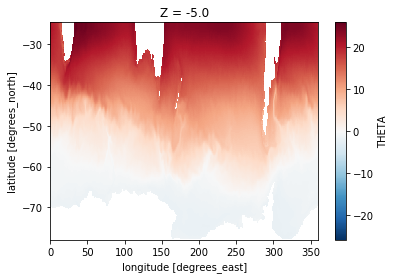

In [10]:
sst_mean.where(surface_mask).plot()

In [68]:
lower_lat = 0
upper_lat = 95
left_lon = 1700
right_lon = 2200

In [69]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lon_range = dict(XC=slice(left_lon, right_lon))

In [70]:
temp_wg = dsr.THETA.isel(**lat_range, **lon_range)

In [71]:
temp_wg_mean = temp_wg.mean(dim='time')
temp_wg_mean

<xarray.DataArray 'THETA' (Z: 42, YC: 95, XC: 460)>
dask.array<mean_agg-aggregate, shape=(42, 95, 460), dtype=float32, chunksize=(42, 95, 460), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 283.4167 283.58334 283.75 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0

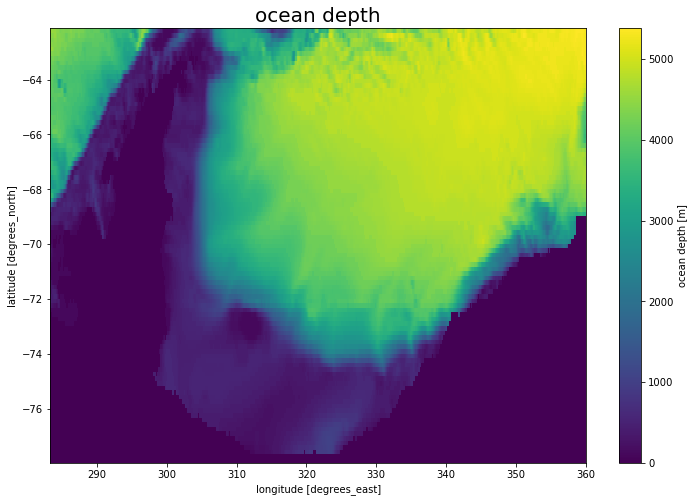

In [72]:
coords.Depth.isel(**lat_range, **lon_range).plot(figsize=(12,8))
plt.title('ocean depth', fontsize=20);

In [31]:
coords.Depth

<xarray.DataArray 'Depth' (YC: 320, XC: 2160)>
dask.array<zarr, shape=(320, 2160), dtype=float32, chunksize=(320, 2160), chunktype=numpy.ndarray>
Coordinates:
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
Attributes:
    coordinate:     XC YC
    long_name:      ocean depth
    standard_name:  ocean_depth
    units:          m

In [34]:
dsr.Z

<xarray.DataArray 'Z' (Z: 42)>
array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float32)
Coordinates:
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
Attributes:
    axis:           Z
    long_name:      vertical coordinate of cell center
    positive:       down
    standard_name:  depth
    units:          m

In [73]:
#this gives us the depth of the bottom cell
depth_max = dsr.Z.where(temp_wg_mean.notnull()).max(dim='Z') #use Z instead of Depth bc Depth doesn't have dim Z

In [74]:
depth_max

<xarray.DataArray 'Z' (YC: 95, XC: 460)>
dask.array<nanmax-aggregate, shape=(95, 460), dtype=float32, chunksize=(95, 460), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 283.4167 283.58334 283.75 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083

In [75]:
bottom_temp = temp_wg_mean.sel(Z=depth_max.fillna(0.))

In [76]:
bottom_temp.load()

<xarray.DataArray 'THETA' (YC: 95, XC: 460)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.4786348 ,  2.438824  ,  2.4003236 , ..., -0.85095733,
        -0.851702  , -0.85245836],
       [ 2.680558  ,  2.6437297 ,  2.6081114 , ..., -0.8522474 ,
        -0.853986  , -0.8557372 ],
       [ 2.8598676 ,  2.8282728 ,  2.798137  , ..., -0.85166365,
        -0.85396403, -0.85603875]], dtype=float32)
Coordinates:
  * XC       (XC) float32 283.4167 283.58334 283.75 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
    Z        (YC, XC) float64 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0

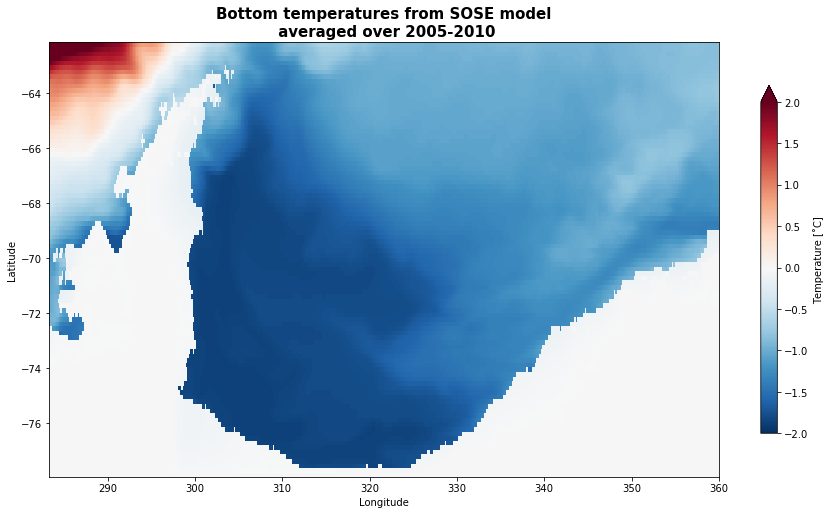

In [85]:
bottom_temp.plot(figsize=(15,8), cbar_kwargs={'shrink':0.8, 'label':'Temperature [˚C]'}, cmap='RdBu_r', vmax=2)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bottom temperatures from SOSE model\n averaged over 2005-2010', fontsize=15, weight='bold');

## BOTTOM SALT

In [8]:
slt_wg = dsr.SALT.isel(**lat_range, **lon_range)

In [9]:
slt_wg_mean = slt_wg.mean(dim='time')
slt_wg_mean

<xarray.DataArray 'SALT' (Z: 42, YC: 95, XC: 460)>
dask.array<mean_agg-aggregate, shape=(42, 95, 460), dtype=float32, chunksize=(42, 95, 460), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 283.4167 283.58334 283.75 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0

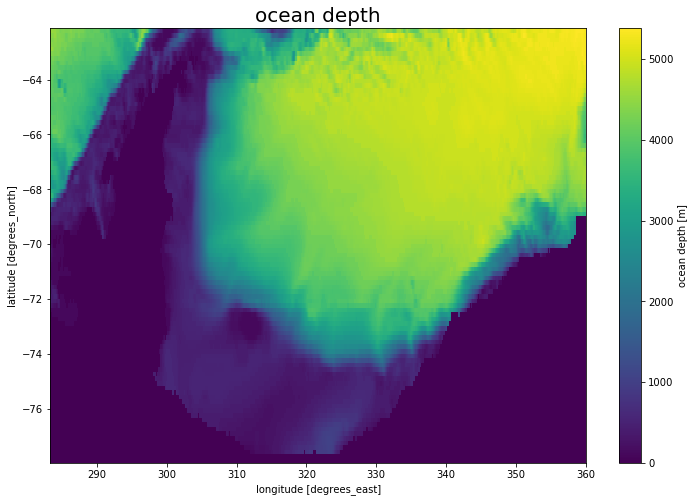

In [10]:
coords.Depth.isel(**lat_range, **lon_range).plot(figsize=(12,8))
plt.title('ocean depth', fontsize=20);

In [11]:
#this gives us the depth of the bottom cell
depth_max = dsr.Z.where(slt_wg_mean.notnull()).max(dim='Z') #use Z instead of Depth bc Depth doesn't have dim Z

In [12]:
bottom_slt = slt_wg_mean.sel(Z=depth_max.fillna(0.)).load()

In [13]:
bottom_slt

<xarray.DataArray 'SALT' (YC: 95, XC: 460)>
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [33.936123, 33.933426, 33.93092 , ..., 34.039837, 34.038883,
        34.03775 ],
       [33.946476, 33.943974, 33.941624, ..., 34.049866, 34.049076,
        34.04807 ],
       [33.956707, 33.954296, 33.951927, ..., 34.05808 , 34.057457,
        34.056637]], dtype=float32)
Coordinates:
  * XC       (XC) float32 283.4167 283.58334 283.75 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
    Z        (YC, XC) float64 -5.0 -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0 -5.0

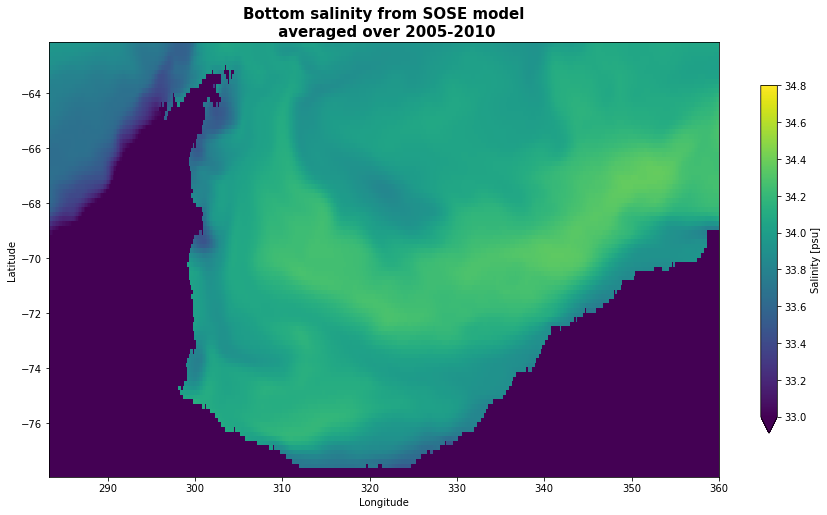

In [14]:
bottom_slt.plot(figsize=(15,8), cbar_kwargs={'shrink':0.8, 'label':'Salinity [psu]'}, vmin=33, vmax=34.8)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Bottom salinity from SOSE model\n averaged over 2005-2010', fontsize=15, weight='bold');